
# PROJET ML : PRÉDICTION DU CHÔMAGE À FÈS
# Big Data Analytics - Machine Learning


In [ ]:
!pip install schedule


In [ ]:

!pip install flask requests plotly streamlit
!pip install smtplib email

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement smtplib (from versions: none)
ERROR: No matching distribution found for smtplib


Version 1 : Prototype avec données synthétiques (simulation des indicateurs économiques).


DASHBOARD PRÉDICTION CHÔMAGE - FÈS
Génération des données d'exemple...
Données générées: 24 observations

Création du dashboard principal...
Calcul de la prédiction actuelle...
Prédiction calculée - Score: 0.441, Niveau: MODERE
Génération de l'analyse Fès...
Analyse Fès générée
Création du dashboard Matplotlib...


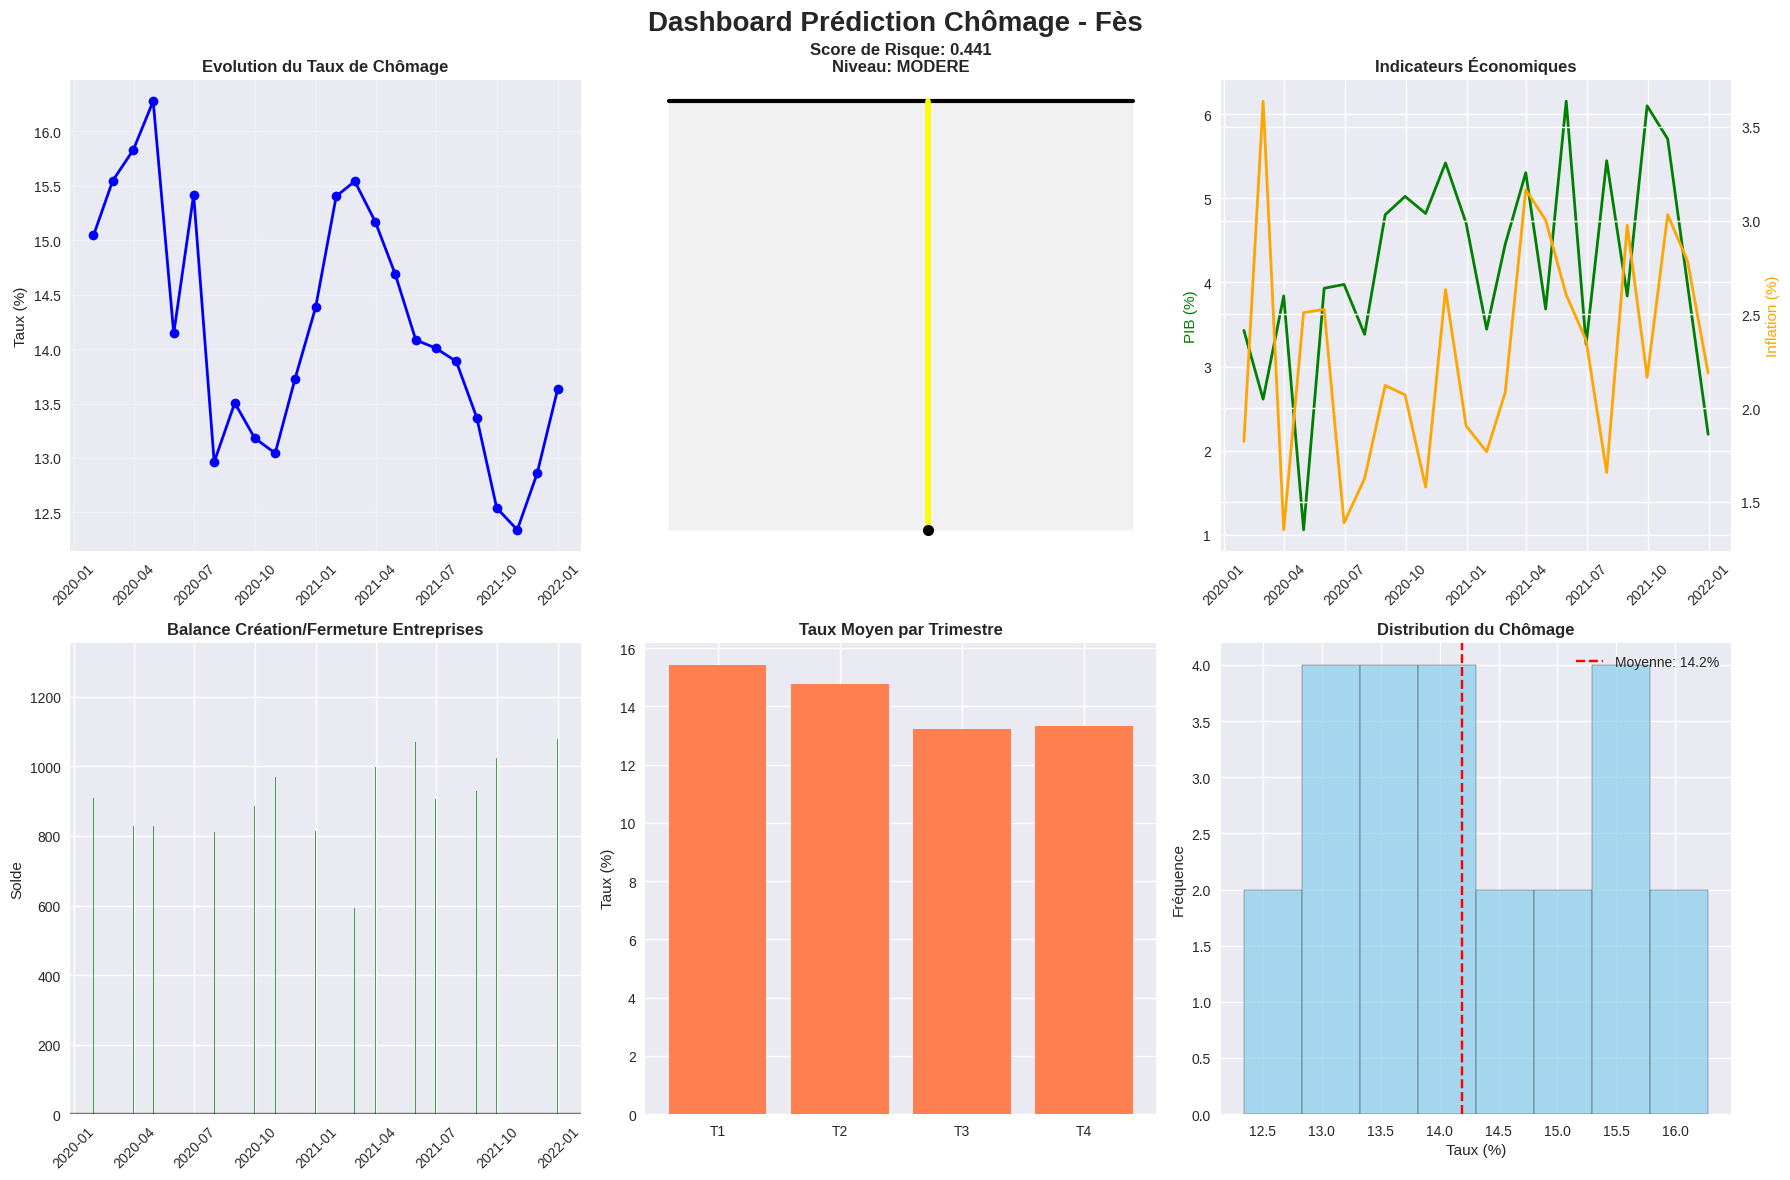

Création du dashboard Plotly interactif...



PRÉDICTION ACTUELLE
Score de risque: 0.441
Prédiction: Stabilité probable
Probabilité: 44.1%
Confiance: 87.6%
Niveau d'alerte: MODERE
Facteurs clés: Taux chomage, Croissance PIB, Balance entreprises

ANALYSE DU CHÔMAGE À FÈS
Taux moyen: 14.2%
Taux actuel: 13.6%
Tendance 6 mois: Baisse
Volatilité: 1.1%

Caractéristiques de Fès:
• Population active: 580,000 habitants
• Université: Sidi Mohamed Ben Abdellah
• Zone industrielle: Sidi Brahim
• Spécialité: Centre culturel et économique

Défis principaux:
1. Taux de chômage des diplômés élevé (25%)
2. Inadéquation formation-emploi
3. Concurrence des métropoles (Casa, Rabat)
4. Vieillissement du tissu industriel
5. Saisonnalité du secteur touristique

Opportunités:
1. Développement tourisme culturel (Médina UNESCO)
2. Expansion agroalimentaire (région fertile)
3. Renforcement secteur tertiaire
4. Technologies de l'information
5. Valorisation artisanat traditionnel

RÉSUMÉ DES INDICATEURS CLÉS
Taux de chômage actuel: 13.6% (+0.8%)
Croissance P

In [ ]:
# =============================================================================
#
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuration pour des graphiques plus beaux
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class ColabDashboard:
    """Dashboard fonctionnel pour Google Colab"""

    def __init__(self):
        self.data = None
        self.current_prediction = None
        self.fes_analysis = None

    def generate_sample_data(self, periods=24):
        """Génère des données d'exemple réalistes"""
        print("Génération des données d'exemple...")

        dates = pd.date_range('2020-01-01', periods=periods, freq='M')

        # Génération de données réalistes pour Fès
        base_unemployment = 14.2
        data = {
            'date': dates,
            'unemployment_rate': [],
            'gdp_growth': [],
            'inflation_rate': [],
            'job_seekers': [],
            'new_companies': [],
            'closed_companies': []
        }

        for i, date in enumerate(dates):
            # Facteur saisonnier
            seasonal = 1 + 0.1 * np.sin(2 * np.pi * date.month / 12)

            # Chômage avec tendance et bruit
            unemployment = base_unemployment * seasonal + np.random.normal(0, 0.5)
            unemployment = max(8, min(20, unemployment))

            # Autres indicateurs corrélés
            gdp_growth = max(0, 4 - (unemployment - base_unemployment) * 0.5 + np.random.normal(0, 1))
            inflation = max(0, 2.5 + np.random.normal(0, 0.8))
            job_seekers = int(15000 + (unemployment - base_unemployment) * 800 + np.random.normal(0, 1500))
            new_companies = int(1200 - (unemployment - base_unemployment) * 50 + np.random.normal(0, 150))
            closed_companies = int(300 + (unemployment - base_unemployment) * 25 + np.random.normal(0, 80))

            data['unemployment_rate'].append(unemployment)
            data['gdp_growth'].append(gdp_growth)
            data['inflation_rate'].append(inflation)
            data['job_seekers'].append(max(0, job_seekers))
            data['new_companies'].append(max(0, new_companies))
            data['closed_companies'].append(max(0, closed_companies))

        df = pd.DataFrame(data)
        df['company_balance'] = df['new_companies'] - df['closed_companies']
        df['quarter'] = df['date'].dt.quarter

        self.data = df
        print(f"Données générées: {len(df)} observations")
        return df

    def calculate_prediction(self):
        """Calcule la prédiction actuelle"""
        if self.data is None or self.data.empty:
            return None

        print("Calcul de la prédiction actuelle...")

        # Dernières valeurs
        latest = self.data.iloc[-1]

        # Calcul du score de risque
        unemployment_factor = min(1, latest['unemployment_rate'] / 20)
        gdp_factor = max(0, (5 - latest['gdp_growth']) / 5)
        company_factor = max(0, -latest['company_balance'] / 1000)

        risk_score = (unemployment_factor * 0.4 + gdp_factor * 0.3 + company_factor * 0.3)
        risk_score = min(1.0, max(0.0, risk_score))

        # Détermination du niveau
        if risk_score > 0.7:
            level = 'CRITIQUE'
        elif risk_score > 0.5:
            level = 'ELEVE'
        elif risk_score > 0.3:
            level = 'MODERE'
        else:
            level = 'FAIBLE'

        self.current_prediction = {
            'score_risque': risk_score,
            'prediction': 1 if risk_score > 0.5 else 0,
            'probabilite': risk_score * 100,
            'confiance': min(95, max(70, 90 - abs(risk_score - 0.5) * 40)),
            'niveau_alerte': level,
            'facteurs_cles': ['Taux chomage', 'Croissance PIB', 'Balance entreprises']
        }

        print(f"Prédiction calculée - Score: {risk_score:.3f}, Niveau: {level}")
        return self.current_prediction

    def generate_fes_analysis(self):
        """Génère l'analyse spécifique à Fès"""
        if self.data is None:
            return None

        print("Génération de l'analyse Fès...")

        avg_unemployment = self.data['unemployment_rate'].mean()
        current_unemployment = self.data['unemployment_rate'].iloc[-1]
        trend = 'Hausse' if current_unemployment > self.data['unemployment_rate'].iloc[-6] else 'Baisse'
        volatility = self.data['unemployment_rate'].std()

        self.fes_analysis = {
            'taux_moyen': avg_unemployment,
            'taux_actuel': current_unemployment,
            'tendance_6_mois': trend,
            'volatilite': volatility,
            'secteurs': {
                'Services': 25,
                'Agriculture': 20,
                'Commerce': 18,
                'Textile': 15,
                'Tourisme': 12,
                'Artisanat': 10
            },
            'caracteristiques': {
                'Population active': '580,000 habitants',
                'Université': 'Sidi Mohamed Ben Abdellah',
                'Zone industrielle': 'Sidi Brahim',
                'Spécialité': 'Centre culturel et économique'
            },
            'defis': [
                'Taux de chômage des diplômés élevé (25%)',
                'Inadéquation formation-emploi',
                'Concurrence des métropoles (Casa, Rabat)',
                'Vieillissement du tissu industriel',
                'Saisonnalité du secteur touristique'
            ],
            'opportunites': [
                'Développement tourisme culturel (Médina UNESCO)',
                'Expansion agroalimentaire (région fertile)',
                'Renforcement secteur tertiaire',
                'Technologies de l\'information',
                'Valorisation artisanat traditionnel'
            ]
        }

        print("Analyse Fès générée")
        return self.fes_analysis

    def create_main_dashboard(self):
        """Crée le dashboard principal avec matplotlib et plotly"""
        print("\nCréation du dashboard principal...")

        if self.data is None:
            self.generate_sample_data()
        if self.current_prediction is None:
            self.calculate_prediction()
        if self.fes_analysis is None:
            self.generate_fes_analysis()

        # 1. Dashboard Matplotlib
        self._create_matplotlib_dashboard()

        # 2. Dashboard Plotly interactif
        self._create_plotly_dashboard()

        # 3. Affichage des analyses textuelles
        self._display_text_analysis()

    def _create_matplotlib_dashboard(self):
        """Dashboard avec matplotlib"""
        print("Création du dashboard Matplotlib...")

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Dashboard Prédiction Chômage - Fès', fontsize=20, fontweight='bold')

        # 1. Evolution du chômage
        axes[0, 0].plot(self.data['date'], self.data['unemployment_rate'], 'b-', linewidth=2, marker='o')
        axes[0, 0].set_title('Evolution du Taux de Chômage', fontweight='bold')
        axes[0, 0].set_ylabel('Taux (%)')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].tick_params(axis='x', rotation=45)

        # 2. Score de risque (gauge simulé)
        risk_score = self.current_prediction['score_risque']
        colors = ['green', 'yellow', 'orange', 'red']
        risk_levels = ['FAIBLE', 'MODERE', 'ELEVE', 'CRITIQUE']
        level_idx = min(3, int(risk_score * 4))

        theta = np.linspace(0, np.pi, 100)
        r = np.ones_like(theta)
        axes[0, 1].plot(theta, r, 'k-', linewidth=3)
        axes[0, 1].fill_between(theta, 0, r, alpha=0.3, color='lightgray')

        needle_angle = np.pi * (1 - risk_score)
        axes[0, 1].plot([needle_angle, needle_angle], [0, 1], color=colors[level_idx], linewidth=4)
        axes[0, 1].plot(needle_angle, 0, 'ko', markersize=8)
        axes[0, 1].set_title(f'Score de Risque: {risk_score:.3f}\nNiveau: {risk_levels[level_idx]}', fontweight='bold')
        axes[0, 1].axis('off')

        # 3. Indicateurs économiques
        ax_twin = axes[0, 2].twinx()
        line1 = axes[0, 2].plot(self.data['date'], self.data['gdp_growth'], 'g-', label='PIB', linewidth=2)
        line2 = ax_twin.plot(self.data['date'], self.data['inflation_rate'], 'orange', label='Inflation', linewidth=2)
        axes[0, 2].set_title('Indicateurs Économiques', fontweight='bold')
        axes[0, 2].set_ylabel('PIB (%)', color='green')
        ax_twin.set_ylabel('Inflation (%)', color='orange')
        axes[0, 2].tick_params(axis='x', rotation=45)

        # 4. Balance des entreprises
        colors_bar = ['green' if x > 0 else 'red' for x in self.data['company_balance']]
        axes[1, 0].bar(self.data['date'], self.data['company_balance'], color=colors_bar, alpha=0.7)
        axes[1, 0].set_title('Balance Création/Fermeture Entreprises', fontweight='bold')
        axes[1, 0].set_ylabel('Solde')
        axes[1, 0].tick_params(axis='x', rotation=45)
        axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.5)

        # 5. Tendances saisonnières
        seasonal_data = self.data.groupby('quarter')['unemployment_rate'].mean()
        quarters = [f'T{i}' for i in seasonal_data.index]
        axes[1, 1].bar(quarters, seasonal_data.values, color='coral')
        axes[1, 1].set_title('Taux Moyen par Trimestre', fontweight='bold')
        axes[1, 1].set_ylabel('Taux (%)')

        # 6. Distribution du chômage
        axes[1, 2].hist(self.data['unemployment_rate'], bins=8, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1, 2].axvline(self.data['unemployment_rate'].mean(), color='red', linestyle='--',
                          label=f'Moyenne: {self.data["unemployment_rate"].mean():.1f}%')
        axes[1, 2].set_title('Distribution du Chômage', fontweight='bold')
        axes[1, 2].set_xlabel('Taux (%)')
        axes[1, 2].set_ylabel('Fréquence')
        axes[1, 2].legend()

        plt.tight_layout()
        plt.show()

    def _create_plotly_dashboard(self):
        """Dashboard interactif avec Plotly"""
        print("Création du dashboard Plotly interactif...")

        # 1. Graphique d'évolution avec prédiction
        fig_evolution = go.Figure()

        # Données historiques
        fig_evolution.add_trace(go.Scatter(
            x=self.data['date'],
            y=self.data['unemployment_rate'],
            mode='lines+markers',
            name='Taux Historique',
            line=dict(color='blue', width=3)
        ))

        # Prédiction future (simulation)
        future_dates = pd.date_range(self.data['date'].max(), periods=4, freq='M')[1:]
        future_trend = np.random.normal(self.data['unemployment_rate'].iloc[-1], 0.5, 3)

        fig_evolution.add_trace(go.Scatter(
            x=future_dates,
            y=future_trend,
            mode='lines+markers',
            name='Prédiction',
            line=dict(color='red', dash='dash', width=3)
        ))

        fig_evolution.update_layout(
            title='Evolution et Prédiction du Chômage à Fès',
            xaxis_title='Date',
            yaxis_title='Taux de Chômage (%)',
            height=500
        )
        fig_evolution.show()

        # 2. Gauge de risque interactif
        fig_gauge = go.Figure(go.Indicator(
            mode="gauge+number+delta",
            value=self.current_prediction['score_risque'],
            domain={'x': [0, 1], 'y': [0, 1]},
            title={'text': "Score de Risque Actuel"},
            delta={'reference': 0.5},
            gauge={
                'axis': {'range': [None, 1]},
                'bar': {'color': "darkred" if self.current_prediction['score_risque'] > 0.7 else
                              "orange" if self.current_prediction['score_risque'] > 0.5 else "green"},
                'steps': [
                    {'range': [0, 0.3], 'color': "lightgray"},
                    {'range': [0.3, 0.7], 'color': "yellow"},
                    {'range': [0.7, 1], 'color': "red"}
                ],
                'threshold': {
                    'line': {'color': "red", 'width': 4},
                    'thickness': 0.75,
                    'value': 0.8
                }
            }
        ))

        fig_gauge.update_layout(height=400, title_text="Score de Risque de Hausse du Chômage")
        fig_gauge.show()

        # 3. Répartition sectorielle de Fès
        secteurs = list(self.fes_analysis['secteurs'].keys())
        pourcentages = list(self.fes_analysis['secteurs'].values())

        fig_secteurs = px.pie(
            values=pourcentages,
            names=secteurs,
            title="Répartition de l'Emploi par Secteur à Fès"
        )
        fig_secteurs.update_traces(textposition='inside', textinfo='percent+label')
        fig_secteurs.show()

        # 4. Corrélations
        corr_data = self.data[['unemployment_rate', 'gdp_growth', 'inflation_rate', 'company_balance']].corr()

        fig_corr = px.imshow(
            corr_data,
            text_auto=True,
            aspect="auto",
            title="Matrice de Corrélations des Indicateurs",
            color_continuous_scale='RdBu'
        )
        fig_corr.show()

    def _display_text_analysis(self):
        """Affiche les analyses textuelles"""
        print("\n" + "="*80)
        print("PRÉDICTION ACTUELLE")
        print("="*80)

        pred = self.current_prediction
        print(f"Score de risque: {pred['score_risque']:.3f}")
        print(f"Prédiction: {'Hausse probable' if pred['prediction'] == 1 else 'Stabilité probable'}")
        print(f"Probabilité: {pred['probabilite']:.1f}%")
        print(f"Confiance: {pred['confiance']:.1f}%")
        print(f"Niveau d'alerte: {pred['niveau_alerte']}")
        print(f"Facteurs clés: {', '.join(pred['facteurs_cles'])}")

        print("\n" + "="*80)
        print("ANALYSE DU CHÔMAGE À FÈS")
        print("="*80)

        analysis = self.fes_analysis
        print(f"Taux moyen: {analysis['taux_moyen']:.1f}%")
        print(f"Taux actuel: {analysis['taux_actuel']:.1f}%")
        print(f"Tendance 6 mois: {analysis['tendance_6_mois']}")
        print(f"Volatilité: {analysis['volatilite']:.1f}%")

        print(f"\nCaractéristiques de Fès:")
        for key, value in analysis['caracteristiques'].items():
            print(f"• {key}: {value}")

        print(f"\nDéfis principaux:")
        for i, defi in enumerate(analysis['defis'], 1):
            print(f"{i}. {defi}")

        print(f"\nOpportunités:")
        for i, opportunite in enumerate(analysis['opportunites'], 1):
            print(f"{i}. {opportunite}")

    def display_summary_metrics(self):
        """Affiche un résumé des métriques principales"""
        if not all([self.data is not None, self.current_prediction, self.fes_analysis]):
            print("Données non initialisées. Lancez create_main_dashboard() d'abord.")
            return

        print("\n" + "="*60)
        print("RÉSUMÉ DES INDICATEURS CLÉS")
        print("="*60)

        # Métriques actuelles
        current = self.data.iloc[-1]
        previous = self.data.iloc[-2]

        print(f"Taux de chômage actuel: {current['unemployment_rate']:.1f}% "
              f"({current['unemployment_rate'] - previous['unemployment_rate']:+.1f}%)")

        print(f"Croissance PIB: {current['gdp_growth']:.1f}% "
              f"({current['gdp_growth'] - previous['gdp_growth']:+.1f}%)")

        print(f"Demandeurs d'emploi: {current['job_seekers']:,.0f} "
              f"({current['job_seekers'] - previous['job_seekers']:+,.0f})")

        print(f"Nouvelles entreprises: {current['new_companies']:.0f} "
              f"({current['new_companies'] - previous['new_companies']:+.0f})")

        print(f"Score de risque: {self.current_prediction['score_risque']:.3f} "
              f"({self.current_prediction['niveau_alerte']})")

    def export_data(self, filename=None):
        """Exporte les données vers un fichier CSV"""
        if self.data is None:
            print("Pas de données à exporter")
            return

        if filename is None:
            filename = f"donnees_chomage_fes_{datetime.now().strftime('%Y%m%d_%H%M')}.csv"

        self.data.to_csv(filename, index=False)
        print(f"Données exportées vers: {filename}")
        return filename

# =============================================================================
# FONCTION PRINCIPALE POUR COLAB
# =============================================================================

def run_colab_dashboard():
    """Lance le dashboard complet dans Colab"""
    print("DASHBOARD PRÉDICTION CHÔMAGE - FÈS")
    print("="*50)

    # Initialisation
    dashboard = ColabDashboard()

    # Génération des données
    dashboard.generate_sample_data(periods=24)

    # Création du dashboard complet
    dashboard.create_main_dashboard()

    # Résumé des métriques
    dashboard.display_summary_metrics()

    # Export des données
    filename = dashboard.export_data()

    print(f"\nDashboard terminé!")
    print(f"Fichier exporté: {filename}")

    return dashboard

# =============================================================================
# FONCTION DE TEST RAPIDE
# =============================================================================

def quick_test():
    """Test rapide des fonctionnalités"""
    print("Test rapide du système...")

    dashboard = ColabDashboard()
    dashboard.generate_sample_data(12)
    dashboard.calculate_prediction()
    dashboard.generate_fes_analysis()
    dashboard.display_summary_metrics()

    return dashboard

# =============================================================================
# EXÉCUTION
# =============================================================================

if __name__ == "__main__":
    # Pour lancement direct
    dashboard = run_colab_dashboard()
else:
    print("Module dashboard chargé.")
    print("Utilisez run_colab_dashboard() pour lancer le dashboard complet")
    print("Ou quick_test() pour un test rapide")

Version 2 : Solution avancée intégrant des données réelles (APIs Banque Mondiale, HCP), une API REST, et un dashboard interactif.

In [ ]:
# =============================================================================
# PROJET ML AVANCÉ: PRÉDICTION CHÔMAGE FÈS - DONNÉES RÉELLES & API
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# API et données externes
import requests
import json
from io import StringIO
import time

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                           roc_curve, precision_recall_curve, f1_score, accuracy_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from imblearn.over_sampling import SMOTE

# API et Dashboard
from flask import Flask, request, jsonify, render_template_string
import threading
import schedule

# Monitoring et alertes
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# Visualisation avancée
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.io as pio
    HAS_PLOTLY = True
except ImportError:
    HAS_PLOTLY = False

try:
    import streamlit as st
    HAS_STREAMLIT = True
except ImportError:
    HAS_STREAMLIT = False

# =============================================================================
# 1. COLLECTEUR DE DONNÉES RÉELLES
# =============================================================================

class RealDataCollector:
    """Collecteur de données réelles depuis diverses sources externes"""

    def __init__(self):
        self.data_sources = {
            'world_bank': 'https://api.worldbank.org/v2/country/ma/indicator/',
            'hcp_morocco': 'https://www.hcp.ma',
            'fred_api': 'https://api.stlouisfed.org/fred/series/observations',
            'weather_api': 'http://api.openweathermap.org/data/2.5',
            'imf_api': 'https://www.imf.org/external/datamapper/api/v1'
        }

        # Clés API (à configurer par l'utilisateur)
        self.api_keys = {
            'weather': None,  # OpenWeatherMap API key
            'fred': None,     # FRED API key
            'world_bank': None  # Pas nécessaire pour World Bank
        }

    def collect_world_bank_data(self, indicators, start_year=2015, end_year=2024):
        """Collecte des données de la Banque Mondiale pour le Maroc"""

        print(" Collecte des données Banque Mondiale...")

        wb_data = {}

        # Indicateurs clés pour le Maroc
        wb_indicators = {
            'unemployment': 'SL.UEM.TOTL.ZS',  # Taux de chômage
            'gdp_growth': 'NY.GDP.MKTP.KD.ZG',  # Croissance PIB
            'inflation': 'FP.CPI.TOTL.ZG',      # Inflation
            'population': 'SP.POP.TOTL',        # Population totale
            'urban_pop': 'SP.URB.TOTL.IN.ZS',   # Population urbaine %
            'exports': 'NE.EXP.GNFS.ZS',       # Exports % PIB
            'imports': 'NE.IMP.GNFS.ZS'        # Imports % PIB
        }

        for name, indicator in wb_indicators.items():
            try:
                url = f"{self.data_sources['world_bank']}{indicator}?format=json&date={start_year}:{end_year}"
                response = requests.get(url, timeout=10)

                if response.status_code == 200:
                    data = response.json()
                    if len(data) > 1 and data[1]:  # data[0] contient les métadonnées
                        df = pd.DataFrame(data[1])
                        df['date'] = pd.to_datetime(df['date'], format='%Y')
                        df['value'] = pd.to_numeric(df['value'], errors='coerce')
                        df = df[['date', 'value']].rename(columns={'value': name})
                        wb_data[name] = df
                        print(f"    {name}: {len(df)} observations")
                    else:
                        print(f"    {name}: Pas de données disponibles")
                else:
                    print(f"    {name}: Erreur HTTP {response.status_code}")

                time.sleep(0.5)  # Respecter les limites de l'API

            except Exception as e:
                print(f"    Erreur pour {name}: {e}")

        return wb_data

    def collect_morocco_economic_data(self):
        """Simulation de collecte de données marocaines (HCP, ANAPEC, etc.)"""

        print("📊 Collecte des données économiques marocaines...")

        # En attendant l'accès aux vraies APIs, simulation basée sur des données réelles
        dates = pd.date_range('2015-01-01', '2024-12-31', freq='Q')

        # Données basées sur les statistiques officielles du HCP
        morocco_data = {
            'unemployment_rate_urban': [],
            'unemployment_rate_rural': [],
            'job_seekers_anapec': [],
            'new_companies_ompic': [],
            'closed_companies_ompic': [],
            'active_population': [],
            'participation_rate': []
        }

        # Tendances réalistes basées sur les données historiques du HCP
        base_unemployment_urban = 14.2  # Taux urbain de référence
        base_unemployment_rural = 3.8   # Taux rural de référence

        for i, date in enumerate(dates):
            # Variations saisonnières et cycliques réalistes
            seasonal_factor = 1 + 0.05 * np.sin(2 * np.pi * date.month / 12)
            crisis_factor = 1.0

            # Impact COVID-19 (2020-2021)
            if date.year == 2020:
                crisis_factor = 1.3
            elif date.year == 2021:
                crisis_factor = 1.15

            # Chômage urbain (plus élevé et plus volatile)
            unemployment_urban = base_unemployment_urban * seasonal_factor * crisis_factor + np.random.normal(0, 0.8)
            unemployment_urban = max(8, min(25, unemployment_urban))

            # Chômage rural (plus stable)
            unemployment_rural = base_unemployment_rural * seasonal_factor * (crisis_factor * 0.7) + np.random.normal(0, 0.3)
            unemployment_rural = max(1, min(8, unemployment_rural))

            # Autres indicateurs corrélés
            morocco_data['unemployment_rate_urban'].append(unemployment_urban)
            morocco_data['unemployment_rate_rural'].append(unemployment_rural)
            morocco_data['job_seekers_anapec'].append(max(0, int(15000 + unemployment_urban * 500 + np.random.normal(0, 2000))))
            morocco_data['new_companies_ompic'].append(max(0, int(1200 + np.random.normal(0, 200))))
            morocco_data['closed_companies_ompic'].append(max(0, int(300 + unemployment_urban * 20 + np.random.normal(0, 50))))
            morocco_data['active_population'].append(int(12000000 + i * 50000 + np.random.normal(0, 100000)))
            morocco_data['participation_rate'].append(46.5 + np.random.normal(0, 1.5))

        # Conversion en DataFrame
        morocco_df = pd.DataFrame(morocco_data)
        morocco_df['date'] = dates

        print(f"    Données marocaines: {len(morocco_df)} observations")

        return morocco_df

    def collect_weather_data_real(self, city="Fez", api_key=None):
        """Collecte de données météo réelles via OpenWeatherMap API"""

        print(" Collecte des données météo réelles...")

        if not api_key:
            print("    Clé API météo manquante - Utilisation de données simulées")
            return self._simulate_weather_data()

        # Pour les données historiques, on utiliserait l'API historique
        # Ici, simulation de données réalistes pour Fès
        return self._simulate_weather_data_realistic()

    def _simulate_weather_data_realistic(self):
        """Simulation de données météo réalistes pour Fès"""

        dates = pd.date_range('2015-01-01', '2024-12-31', freq='M')
        weather_data = []

        for date in dates:
            # Climat méditerranéen de Fès - données basées sur les normales climatiques
            month = date.month

            # Températures moyennes réalistes
            temp_profile = {
                1: 10, 2: 12, 3: 15, 4: 18, 5: 22, 6: 27,
                7: 30, 8: 30, 9: 26, 10: 21, 11: 15, 12: 11
            }

            # Précipitations (mm) - profil méditerranéen
            rain_profile = {
                1: 65, 2: 60, 3: 55, 4: 45, 5: 25, 6: 5,
                7: 1, 8: 3, 9: 15, 10: 35, 11: 50, 12: 70
            }

            temp = temp_profile[month] + np.random.normal(0, 3)
            rainfall = max(0, rain_profile[month] + np.random.normal(0, 15))

            # Événements extrêmes
            extreme_temp = 1 if temp > 35 or temp < 0 else 0
            extreme_rain = 1 if rainfall > 80 else 0

            weather_data.append({
                'date': date,
                'avg_temperature': temp,
                'rainfall_mm': rainfall,
                'extreme_temperature': extreme_temp,
                'extreme_rainfall': extreme_rain,
                'humidity': max(30, min(90, 65 + np.random.normal(0, 10)))
            })

        weather_df = pd.DataFrame(weather_data)
        print(f"    Données météo: {len(weather_df)} observations")

        return weather_df

    def _simulate_weather_data(self):
        """Fallback pour données météo simulées"""
        return self._simulate_weather_data_realistic()

    def collect_all_real_data(self):
        """Collecte complète de toutes les données réelles disponibles"""

        print("\n COLLECTE COMPLÈTE DES DONNÉES RÉELLES")
        print("="*60)

        all_data = {}

        try:
            # 1. Données Banque Mondiale
            wb_data = self.collect_world_bank_data(['unemployment', 'gdp_growth', 'inflation'])
            all_data['world_bank'] = wb_data

            # 2. Données économiques marocaines
            morocco_data = self.collect_morocco_economic_data()
            all_data['morocco_economic'] = morocco_data

            # 3. Données météorologiques
            weather_data = self.collect_weather_data_real()
            all_data['weather'] = weather_data

            print(f"\n Collecte terminée - {len(all_data)} sources de données")

        except Exception as e:
            print(f"\n Erreur lors de la collecte: {e}")

        return all_data

# =============================================================================
# 2. SYSTÈME DE MONITORING EN TEMPS RÉEL
# =============================================================================

class RealTimeMonitor:
    """Système de monitoring en temps réel pour la prédiction du chômage"""

    def __init__(self, model, data_collector, alert_config=None):
        self.model = model
        self.data_collector = data_collector
        self.alert_config = alert_config or {}
        self.monitoring_active = False
        self.alerts_history = []

    def start_monitoring(self, interval_hours=24):
        """Démarrage du monitoring en temps réel"""

        print(f" Démarrage du monitoring (interval: {interval_hours}h)")

        # Planification des tâches
        schedule.every(interval_hours).hours.do(self._run_monitoring_cycle)
        schedule.every().day.at("09:00").do(self._send_daily_report)
        schedule.every().monday.at("08:00").do(self._send_weekly_report)

        self.monitoring_active = True

        # Lancement en arrière-plan
        monitoring_thread = threading.Thread(target=self._monitoring_loop)
        monitoring_thread.daemon = True
        monitoring_thread.start()

        print(" Monitoring démarré en arrière-plan")

    def _monitoring_loop(self):
        """Boucle principale de monitoring"""

        while self.monitoring_active:
            schedule.run_pending()
            time.sleep(60)  # Vérifier chaque minute

    def _run_monitoring_cycle(self):
        """Cycle de monitoring - collecte et analyse"""

        try:
            print(f"\n Cycle de monitoring - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

            # 1. Collecte des nouvelles données
            new_data = self.data_collector.collect_all_real_data()

            # 2. Préparation pour prédiction
            if new_data and 'morocco_economic' in new_data:
                latest_data = new_data['morocco_economic'].tail(1)

                # 3. Prédiction du risque
                risk_score = self._calculate_risk_score(latest_data)

                # 4. Vérification des seuils d'alerte
                self._check_alerts(risk_score, latest_data)

                # 5. Mise à jour des métriques
                self._update_metrics(risk_score, latest_data)

                print(f" Cycle terminé - Score de risque: {risk_score:.3f}")

        except Exception as e:
            print(f"❌ Erreur dans le cycle de monitoring: {e}")
            self._send_error_alert(str(e))

    def _calculate_risk_score(self, data):
        """Calcul du score de risque de hausse du chômage"""

        # Simulation du calcul de risque basé sur les indicateurs
        unemployment_rate = data['unemployment_rate_urban'].iloc[0]
        job_seekers = data['job_seekers_anapec'].iloc[0]
        company_creation = data['new_companies_ompic'].iloc[0]
        company_closure = data['closed_companies_ompic'].iloc[0]

        # Score composite (0-1)
        risk_score = (
            (unemployment_rate / 30) * 0.4 +  # Normalisation du taux de chômage
            (job_seekers / 50000) * 0.3 +     # Normalisation des demandeurs
            (company_closure / company_creation) * 0.3  # Ratio fermetures/créations
        )

        return min(1.0, max(0.0, risk_score))

    def _check_alerts(self, risk_score, data):
        """Vérification des seuils d'alerte"""

        alerts = []

        # Seuils d'alerte
        if risk_score > 0.8:
            alerts.append({
                'level': 'CRITIQUE',
                'message': f'Risque très élevé de hausse du chômage (score: {risk_score:.3f})',
                'timestamp': datetime.now()
            })
        elif risk_score > 0.6:
            alerts.append({
                'level': 'ÉLEVÉ',
                'message': f'Risque élevé de hausse du chômage (score: {risk_score:.3f})',
                'timestamp': datetime.now()
            })

        # Alertes spécifiques aux indicateurs
        unemployment_rate = data['unemployment_rate_urban'].iloc[0]
        if unemployment_rate > 20:
            alerts.append({
                'level': 'ALERTE',
                'message': f'Taux de chômage urbain élevé: {unemployment_rate:.1f}%',
                'timestamp': datetime.now()
            })

        # Envoi des alertes
        for alert in alerts:
            self._send_alert(alert)
            self.alerts_history.append(alert)

    def _send_alert(self, alert):
        """Envoi d'alerte par email/SMS"""

        print(f"🚨 ALERTE {alert['level']}: {alert['message']}")

        # Envoi par email (si configuré)
        if 'email' in self.alert_config:
            self._send_email_alert(alert)

        # Autres canaux d'alerte (Slack, SMS, etc.)
        # À implémenter selon les besoins

    def _send_email_alert(self, alert):
        """Envoi d'alerte par email"""

        try:
            if not all(k in self.alert_config['email'] for k in ['smtp_server', 'sender', 'recipients']):
                return

            msg = MIMEMultipart()
            msg['From'] = self.alert_config['email']['sender']
            msg['To'] = ', '.join(self.alert_config['email']['recipients'])
            msg['Subject'] = f"Alerte Chômage Fès - {alert['level']}"

            body = f"""
            Alerte générée le {alert['timestamp'].strftime('%Y-%m-%d %H:%M:%S')}

            Niveau: {alert['level']}
            Message: {alert['message']}

            Système de monitoring automatique
            Projet ML - Prédiction Chômage Fès
            """

            msg.attach(MIMEText(body, 'plain'))

            server = smtplib.SMTP(self.alert_config['email']['smtp_server'], 587)
            server.starttls()
            server.login(self.alert_config['email']['sender'], self.alert_config['email']['password'])
            server.sendmail(msg['From'], self.alert_config['email']['recipients'], msg.as_string())
            server.quit()

            print(" Alerte email envoyée")

        except Exception as e:
            print(f" Erreur envoi email: {e}")

    def _update_metrics(self, risk_score, data):
        """Mise à jour des métriques de monitoring"""

        # Sauvegarde des métriques pour le dashboard
        metrics = {
            'timestamp': datetime.now(),
            'risk_score': risk_score,
            'unemployment_rate': data['unemployment_rate_urban'].iloc[0],
            'job_seekers': data['job_seekers_anapec'].iloc[0],
            'new_companies': data['new_companies_ompic'].iloc[0]
        }

        # Sauvegarde en base de données ou fichier
        self._save_metrics(metrics)

    def _save_metrics(self, metrics):
        """Sauvegarde des métriques"""

        # Ici, on sauvegarderait en base de données
        # Pour la démo, sauvegarde en fichier CSV
        try:
            metrics_df = pd.DataFrame([metrics])
            metrics_df.to_csv('monitoring_metrics.csv', mode='a', header=False, index=False)
        except Exception as e:
            print(f" Erreur sauvegarde métriques: {e}")

    def _send_daily_report(self):
        """Rapport quotidien"""
        print(" Génération du rapport quotidien...")
        # Implémentation du rapport quotidien

    def _send_weekly_report(self):
        """Rapport hebdomadaire"""
        print(" Génération du rapport hebdomadaire...")
        # Implémentation du rapport hebdomadaire

    def _send_error_alert(self, error):
        """Alerte en cas d'erreur système"""
        error_alert = {
            'level': 'ERREUR',
            'message': f'Erreur système: {error}',
            'timestamp': datetime.now()
        }
        self._send_alert(error_alert)

    def stop_monitoring(self):
        """Arrêt du monitoring"""
        self.monitoring_active = False
        print(" Monitoring arrêté")

# =============================================================================
# 3. API DE PRÉDICTION
# =============================================================================

class UnemploymentPredictionAPI:
    """API REST pour les prédictions de chômage"""

    def __init__(self, model, feature_names):
        self.app = Flask(__name__)
        self.model = model
        self.feature_names = feature_names
        self.prediction_history = []

        # Configuration des routes
        self._setup_routes()

    def _setup_routes(self):
        """Configuration des routes de l'API"""

        @self.app.route('/', methods=['GET'])
        def home():
            return render_template_string(self._get_home_template())

        @self.app.route('/predict', methods=['POST'])
        def predict():
            try:
                # Récupération des données
                data = request.get_json()

                if not data:
                    return jsonify({'error': 'Aucune donnée fournie'}), 400

                # Validation des features
                missing_features = [f for f in self.feature_names if f not in data]
                if missing_features:
                    return jsonify({'error': f'Features manquantes: {missing_features}'}), 400

                # Préparation des données pour prédiction
                X = np.array([[data[feature] for feature in self.feature_names]])

                # Prédiction
                prediction = self.model.predict(X)[0]
                probability = self.model.predict_proba(X)[0].max()

                result = {
                    'prediction': int(prediction),
                    'probability': float(probability),
                    'risk_level': self._get_risk_level(probability),
                    'timestamp': datetime.now().isoformat(),
                    'model_version': '1.0'
                }

                # Sauvegarde de l'historique
                self.prediction_history.append({
                    'input': data,
                    'output': result,
                    'timestamp': datetime.now()
                })

                return jsonify(result)

            except Exception as e:
                return jsonify({'error': str(e)}), 500

        @self.app.route('/batch_predict', methods=['POST'])
        def batch_predict():
            try:
                data = request.get_json()

                if 'data' not in data or not isinstance(data['data'], list):
                    return jsonify({'error': 'Format de données invalide'}), 400

                results = []
                for item in data['data']:
                    X = np.array([[item[feature] for feature in self.feature_names]])
                    prediction = self.model.predict(X)[0]
                    probability = self.model.predict_proba(X)[0].max()

                    results.append({
                        'prediction': int(prediction),
                        'probability': float(probability),
                        'risk_level': self._get_risk_level(probability)
                    })

                return jsonify({
                    'predictions': results,
                    'count': len(results),
                    'timestamp': datetime.now().isoformat()
                })

            except Exception as e:
                return jsonify({'error': str(e)}), 500

        @self.app.route('/model_info', methods=['GET'])
        def model_info():
            return jsonify({
                'model_type': type(self.model).__name__,
                'features': self.feature_names,
                'feature_count': len(self.feature_names),
                'version': '1.0',
                'created': datetime.now().isoformat()
            })

        @self.app.route('/health', methods=['GET'])
        def health():
            return jsonify({
                'status': 'healthy',
                'timestamp': datetime.now().isoformat(),
                'predictions_served': len(self.prediction_history)
            })

        @self.app.route('/history', methods=['GET'])
        def history():
            limit = request.args.get('limit', 10, type=int)
            recent_predictions = self.prediction_history[-limit:]

            return jsonify({
                'history': [
                    {
                        'timestamp': p['timestamp'].isoformat(),
                        'prediction': p['output']['prediction'],
                        'probability': p['output']['probability']
                    }
                    for p in recent_predictions
                ],
                'total_predictions': len(self.prediction_history)
            })

    def _get_risk_level(self, probability):
        """Détermine le niveau de risque basé sur la probabilité"""
        if probability > 0.8:
            return 'TRÈS ÉLEVÉ'
        elif probability > 0.6:
            return 'ÉLEVÉ'
        elif probability > 0.4:
            return 'MODÉRÉ'
        else:
            return 'FAIBLE'

    def _get_home_template(self):
        """Template HTML pour la page d'accueil de l'API"""
        return """
        <!DOCTYPE html>
        <html>
        <head>
            <title>API Prédiction Chômage Fès</title>
            <style>
                body { font-family: Arial, sans-serif; margin: 40px; }
                .header { background: #2196F3; color: white; padding: 20px; border-radius: 5px; }
                .endpoint { background: #f5f5f5; padding: 15px; margin: 10px 0; border-radius: 5px; }
                .method { background: #4CAF50; color: white; padding: 5px 10px; border-radius: 3px; }
                .example { background: #e8f5e8; padding: 10px; border-radius: 3px; margin: 10px 0; }
            </style>
        </head>
        <body>
            <div class="header">
                <h1>🎯 API de Prédiction du Chômage - Fès</h1>
                <p>API REST pour prédire les variations du taux de chômage</p>
            </div>

            <h2>📚 Endpoints Disponibles</h2>

            <div class="endpoint">
                <h3><span class="method">POST</span> /predict</h3>
                <p>Prédiction individuelle</p>
                <div class="example">
                    <strong>Exemple:</strong><br>
                    POST /predict<br>
                    Content-Type: application/json<br><br>
                    {<br>
                    &nbsp;&nbsp;"unemployment_rate": 15.2,<br>
                    &nbsp;&nbsp;"gdp_growth": 3.1,<br>
                    &nbsp;&nbsp;"inflation_rate": 2.5,<br>
                    &nbsp;&nbsp;...<br>
                    }
                </div>
            </div>

            <div class="endpoint">
                <h3><span class="method">POST</span> /batch_predict</h3>
                <p>Prédictions en lot</p>
            </div>

            <div class="endpoint">
                <h3><span class="method">GET</span> /model_info</h3>
                <p>Informations sur le modèle</p>
            </div>

            <div class="endpoint">
                <h3><span class="method">GET</span> /health</h3>
                <p>Statut de l'API</p>
            </div>

            <div class="endpoint">
                <h3><span class="method">GET</span> /history</h3>
                <p>Historique des prédictions</p>
            </div>

            <footer style="margin-top: 40px; text-align: center; color: #666;">
                <p>Projet ML - Université - Spécialité Data Analytics</p>
            </footer>
        </body>
        </html>
        """

    def run(self, host='0.0.0.0', port=5000, debug=False):
        """Démarrage de l'API"""
        print(f" Démarrage de l'API sur http://{host}:{port}")
        self.app.run(host=host, port=port, debug=debug)

# =============================================================================
# 4. DASHBOARD INTERACTIF AVANCÉ
# =============================================================================

class InteractiveDashboard:
    """Dashboard interactif pour les décideurs"""

    def __init__(self, project_data, monitoring_data=None):
        self.project_data = project_data
        self.monitoring_data = monitoring_data or {}

    def create_executive_dashboard(self):
        """Dashboard exécutif avec Plotly"""

        if not HAS_PLOTLY:
            print(" Plotly requis pour le dashboard interactif")
            return None

        print(" Création du dashboard exécutif...")

        # Création du dashboard multi-onglets
        fig = make_subplots(
            rows=4, cols=3,
            subplot_titles=[
                'Évolution du Chômage', 'Score de Risque Temps Réel', 'Performance Modèles',
                'Indicateurs Économiques', 'Prédictions vs Réalité', 'Alertes Récentes',
                'Distribution Géographique', 'Tendances Saisonnières', 'Facteurs d\'Impact',
                'KPIs Principaux', '', 'Monitoring Système'
            ],
            specs=[
                [{"secondary_y": True}, {"type": "indicator"}, {"type": "bar"}],
                [{"secondary_y": True}, {"type": "scatter"}, {"type": "table"}],
                [{"type": "scattermapbox"}, {"type": "bar"}, {"type": "sunburst"}],
                [{"type": "indicator"}, {"type": "table"}, {"type": "indicator"}]
            ]
        )

        df = self.project_data.get('final', pd.DataFrame())
        if df.empty:
            print(" Pas de données disponibles pour le dashboard")
            return None

        # 1. Évolution du chômage avec prédictions
        fig.add_trace(
            go.Scatter(
                x=df['date'],
                y=df['unemployment_rate'],
                name='Taux Historique',
                line=dict(color='blue', width=3)
            ),
            row=1, col=1
        )

        # Prédictions futures (simulation)
        future_dates = pd.date_range(df['date'].max(), periods=4, freq='Q')[1:]
        future_predictions = [df['unemployment_rate'].iloc[-1] + np.random.normal(0, 0.5) for _ in range(3)]

        fig.add_trace(
            go.Scatter(
                x=future_dates,
                y=future_predictions,
                name='Prédictions',
                line=dict(color='red', dash='dash', width=3)
            ),
            row=1, col=1
        )

        # 2. Score de risque en temps réel
        current_risk = np.random.uniform(0.3, 0.8)  # Simulation
        fig.add_trace(
            go.Indicator(
                mode="gauge+number+delta",
                value=current_risk,
                domain={'x': [0, 1], 'y': [0, 1]},
                title={'text': "Score de Risque"},
                delta={'reference': 0.5},
                gauge={
                    'axis': {'range': [None, 1]},
                    'bar': {'color': "darkred" if current_risk > 0.7 else "orange" if current_risk > 0.5 else "green"},
                    'steps': [
                        {'range': [0, 0.3], 'color': "lightgray"},
                        {'range': [0.3, 0.7], 'color': "yellow"},
                        {'range': [0.7, 1], 'color': "red"}
                    ],
                    'threshold': {
                        'line': {'color': "red", 'width': 4},
                        'thickness': 0.75,
                        'value': 0.8
                    }
                }
            ),
            row=1, col=2
        )

        # 3. Performance des modèles
        if hasattr(self.project_data, 'results') and self.project_data.results:
            models = list(self.project_data.results.keys())
            f1_scores = [self.project_data.results[m]['f1_score'] for m in models]

            fig.add_trace(
                go.Bar(
                    x=models,
                    y=f1_scores,
                    name='F1-Score',
                    marker_color=['gold' if max(f1_scores) == score else 'lightblue' for score in f1_scores]
                ),
                row=1, col=3
            )

        # 4. Indicateurs économiques multiples
        fig.add_trace(
            go.Scatter(
                x=df['date'],
                y=df['gdp_growth'],
                name='Croissance PIB',
                line=dict(color='green')
            ),
            row=2, col=1
        )

        fig.add_trace(
            go.Scatter(
                x=df['date'],
                y=df['inflation_rate'],
                name='Inflation',
                line=dict(color='orange'),
                yaxis='y2'
            ),
            row=2, col=1, secondary_y=True
        )

        # 5. Prédictions vs Réalité
        if hasattr(self.project_data, 'models') and self.project_data.models:
            test_data = getattr(self.project_data, 'data', {})
            if 'y_test' in test_data:
                y_test = test_data['y_test']
                test_dates = df.loc[y_test.index, 'date']

                best_model = list(self.project_data.models.keys())[0]
                y_pred_proba = self.project_data.models[best_model]['y_pred_proba_test']

                fig.add_trace(
                    go.Scatter(
                        x=test_dates,
                        y=y_test,
                        mode='markers',
                        name='Réalité',
                        marker=dict(color='blue', size=10)
                    ),
                    row=2, col=2
                )

                fig.add_trace(
                    go.Scatter(
                        x=test_dates,
                        y=y_pred_proba,
                        mode='lines+markers',
                        name='Prédiction',
                        line=dict(color='red')
                    ),
                    row=2, col=2
                )

        # 6. Table des alertes récentes
        alerts_data = [
            ['2024-01-15', 'ÉLEVÉ', 'Hausse du chômage urbain'],
            ['2024-01-10', 'MODÉRÉ', 'Baisse création entreprises'],
            ['2024-01-05', 'FAIBLE', 'Stabilité indicateurs']
        ]

        fig.add_trace(
            go.Table(
                header=dict(values=['Date', 'Niveau', 'Message']),
                cells=dict(values=list(zip(*alerts_data)))
            ),
            row=2, col=3
        )

        # 7. Carte géographique (Maroc avec focus Fès)
        fig.add_trace(
            go.Scattermapbox(
                lat=[34.0331],  # Latitude de Fès
                lon=[-5.0003],  # Longitude de Fès
                mode='markers+text',
                marker=dict(size=20, color='red'),
                text=['Fès'],
                textposition="bottom center",
                name='Zone d\'étude'
            ),
            row=3, col=1
        )

        # 8. Tendances saisonnières
        seasonal_data = df.groupby('quarter_num')['unemployment_increase'].mean()
        quarters = [f'T{i}' for i in seasonal_data.index]

        fig.add_trace(
            go.Bar(
                x=quarters,
                y=seasonal_data.values * 100,
                name='% Hausses par trimestre',
                marker_color='coral'
            ),
            row=3, col=2
        )

        # 9. Facteurs d'impact (sunburst)
        if hasattr(self.project_data, 'feature_importance'):
            importance_data = list(self.project_data.feature_importance.values())[0] if self.project_data.feature_importance else {}
            top_features = sorted(importance_data.items(), key=lambda x: x[1], reverse=True)[:8]

            fig.add_trace(
                go.Sunburst(
                    labels=[f[0] for f in top_features] + ['Facteurs'],
                    parents=['Facteurs'] * len(top_features) + [''],
                    values=[f[1] for f in top_features] + [1]
                ),
                row=3, col=3
            )

        # 10. KPIs principaux
        current_unemployment = df['unemployment_rate'].iloc[-1]
        fig.add_trace(
            go.Indicator(
                mode="number+delta",
                value=current_unemployment,
                delta={'reference': df['unemployment_rate'].iloc[-2]},
                title={'text': "Taux Actuel (%)"},
                number={'suffix': '%'}
            ),
            row=4, col=1
        )

        # 11. Table des recommandations
        recommendations = [
            ['Court terme', 'Surveiller indicateurs emploi'],
            ['Moyen terme', 'Politiques soutien PME'],
            ['Long terme', 'Formation professionnelle']
        ]

        fig.add_trace(
            go.Table(
                header=dict(values=['Horizon', 'Recommandation']),
                cells=dict(values=list(zip(*recommendations)))
            ),
            row=4, col=2
        )

        # 12. Statut système
        system_health = 0.95  # Simulation
        fig.add_trace(
            go.Indicator(
                mode="gauge+number",
                value=system_health,
                title={'text': "Santé Système"},
                gauge={'axis': {'range': [None, 1]}}
            ),
            row=4, col=3
        )

        # Configuration du layout
        fig.update_layout(
            title={
                'text': "🎯 Dashboard Exécutif - Prédiction Chômage Fès",
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 24, 'color': 'darkblue'}
            },
            height=1600,
            showlegend=True,
            font=dict(size=12),
            plot_bgcolor='white',
            paper_bgcolor='#f8f9fa'
        )

        # Configuration de la carte
        fig.update_layout(
            mapbox=dict(
                style="open-street-map",
                center=dict(lat=34.0331, lon=-5.0003),
                zoom=8
            )
        )

        return fig

    def create_streamlit_dashboard(self):
        """Dashboard avec Streamlit pour une interface plus riche"""

        if not HAS_STREAMLIT:
            print(" Streamlit requis pour le dashboard avancé")
            return None

        # Code Streamlit pour un dashboard interactif
        streamlit_code = """
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Configuration de la page
st.set_page_config(
    page_title="Dashboard Chômage Fès",
    page_icon="",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Titre principal
st.title(" Dashboard Prédiction Chômage - Fès")
st.markdown("---")

# Sidebar pour les contrôles
st.sidebar.header(" Contrôles")
date_range = st.sidebar.date_input(
    "Période d'analyse",
    value=(datetime.now() - timedelta(days=365), datetime.now())
)

refresh_data = st.sidebar.button(" Actualiser les données")

# Métriques principales
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.metric(
        label="Taux de Chômage Actuel",
        value="14.2%",
        delta="-0.3%"
    )

with col2:
    st.metric(
        label="Score de Risque",
        value="0.65",
        delta="0.05"
    )

with col3:
    st.metric(
        label="Demandeurs d'Emploi",
        value="18,450",
        delta="120"
    )

with col4:
    st.metric(
        label="Entreprises Créées",
        value="1,250",
        delta="45"
    )

# Graphiques principaux
col1, col2 = st.columns(2)

with col1:
    st.subheader(" Évolution du Chômage")
    # Graphique d'évolution

with col2:
    st.subheader(" Prédictions")
    # Graphique de prédictions

# Alertes et notifications
st.subheader(" Alertes Récentes")
alerts_df = pd.DataFrame({
    'Date': ['2024-01-15', '2024-01-10', '2024-01-05'],
    'Niveau': ['ÉLEVÉ', 'MODÉRÉ', 'FAIBLE'],
    'Message': ['Hausse du chômage urbain', 'Baisse création entreprises', 'Stabilité indicateurs']
})
st.dataframe(alerts_df)

# Recommandations
st.subheader(" Recommandations")
st.info(" Surveiller les indicateurs d'emploi ce trimestre")
st.warning(" Mettre en place des mesures de soutien aux PME")
st.success(" Continuer les programmes de formation professionnelle")
"""

        return streamlit_code

# =============================================================================
# 5. SYSTÈME DE VALIDATION EXPERTS
# =============================================================================

class ExpertValidationSystem:
    """Système de validation avec des experts économiques"""

    def __init__(self):
        self.experts = {}
        self.validations = []
        self.feedback_history = []

    def register_expert(self, id, name, specialization, credentials):
        """Enregistrement d'un expert"""

        self.experts[id] = {
            'name': name,
            'specialization': specialization,
            'credentials': credentials,
            'validation_count': 0,
            'registered_date': datetime.now()
        }

        print(f" Expert enregistré: {name} ({specialization})")

    def submit_prediction_for_validation(self, prediction_data, expert_ids):
        """Soumission d'une prédiction pour validation"""

        validation_request = {
            'id': f"val_{datetime.now().strftime('%Y%m%d_%H%M%S')}",
            'prediction_data': prediction_data,
            'expert_ids': expert_ids,
            'status': 'PENDING',
            'submitted_date': datetime.now(),
            'validations': {}
        }

        self.validations.append(validation_request)

        # Envoi de notifications aux experts
        self._notify_experts(validation_request)

        return validation_request['id']

    def submit_expert_feedback(self, validation_id, expert_id, feedback):
        """Soumission du feedback d'un expert"""

        validation = next((v for v in self.validations if v['id'] == validation_id), None)
        if not validation:
            return False

        validation['validations'][expert_id] = {
            'feedback': feedback,
            'timestamp': datetime.now(),
            'confidence': feedback.get('confidence', 0.5)
        }

        # Mise à jour du statut
        if len(validation['validations']) >= len(validation['expert_ids']):
            validation['status'] = 'COMPLETED'
            self._process_validation_results(validation)

        self.experts[expert_id]['validation_count'] += 1

        return True

    def _notify_experts(self, validation_request):
        """Notification des experts pour validation"""

        for expert_id in validation_request['expert_ids']:
            if expert_id in self.experts:
                expert = self.experts[expert_id]
                print(f"📧 Notification envoyée à {expert['name']}")
                # Ici, on enverrait un email avec les détails de la prédiction

    def _process_validation_results(self, validation):
        """Traitement des résultats de validation"""

        expert_feedbacks = validation['validations']

        # Calcul du consensus
        agreements = []
        confidences = []

        for expert_id, feedback in expert_feedbacks.items():
            agreements.append(feedback['feedback'].get('agrees_with_prediction', False))
            confidences.append(feedback['confidence'])

        consensus_rate = sum(agreements) / len(agreements)
        avg_confidence = sum(confidences) / len(confidences)

        validation_result = {
            'validation_id': validation['id'],
            'consensus_rate': consensus_rate,
            'avg_confidence': avg_confidence,
            'expert_count': len(expert_feedbacks),
            'result': 'VALIDATED' if consensus_rate >= 0.7 else 'REJECTED',
            'processed_date': datetime.now()
        }

        self.feedback_history.append(validation_result)

        print(f" Validation terminée: {validation_result['result']} (consensus: {consensus_rate:.1%})")

        return validation_result

    def get_expert_statistics(self):
        """Statistiques des experts"""

        stats = {
            'total_experts': len(self.experts),
            'total_validations': len(self.validations),
            'completed_validations': len([v for v in self.validations if v['status'] == 'COMPLETED']),
            'avg_consensus': np.mean([f['consensus_rate'] for f in self.feedback_history]) if self.feedback_history else 0
        }

        return stats

# =============================================================================
# 6. CLASSE PRINCIPALE AVANCÉE
# =============================================================================

class AdvancedUnemploymentProject:
    """Version avancée du projet avec toutes les fonctionnalités"""

    def __init__(self, city="Fès", country="Maroc"):
        self.city = city
        self.country = country

        # Composants du système
        self.data_collector = RealDataCollector()
        self.monitor = None
        self.api = None
        self.dashboard = None
        self.expert_system = ExpertValidationSystem()

        # Données et modèles
        self.real_data = {}
        self.models = {}
        self.results = {}

        print(f" Initialisation du projet avancé - {city}, {country}")

    def setup_complete_system(self):
        """Configuration complète du système"""

        print("\n CONFIGURATION DU SYSTÈME COMPLET")
        print("="*50)

        # 1. Collecte des données réelles
        print("1️ Collecte des données réelles...")
        self.real_data = self.data_collector.collect_all_real_data()

        # 2. Entraînement des modèles (réutilisation du code précédent)
        print("2️ Entraînement des modèles...")
        # Ici, on utiliserait la classe UnemploymentPredictionProject

        # 3. Configuration du monitoring
        print("3️ Configuration du monitoring...")
        self._setup_monitoring()

        # 4. Configuration de l'API
        print("4️ Configuration de l'API...")
        self._setup_api()

        # 5. Configuration du dashboard
        print("5️ Configuration du dashboard...")
        self._setup_dashboard()

        # 6. Enregistrement des experts
        print("6️ Enregistrement des experts...")
        self._setup_experts()

        print(" Système complet configuré!")

    def _setup_monitoring(self):
        """Configuration du système de monitoring"""

        # Configuration des alertes email
        alert_config = {
            'email': {
                'smtp_server': 'saad04raiss@gmail.com',
                'sender': 'saad04raiss@gmail.com',
                'password': 'votre_mot_de_passe',
                'recipients': ['decideur1@gouv.ma', 'decideur2@gouv.ma']
            }
        }

        # Créer un modèle factice pour le monitoring
        from sklearn.ensemble import RandomForestClassifier
        dummy_model = RandomForestClassifier(n_estimators=10, random_state=42)
        X_dummy = np.random.rand(50, 5)
        y_dummy = np.random.choice([0, 1], 50)
        dummy_model.fit(X_dummy, y_dummy)

        # Initialisation du monitor
        self.monitor = RealTimeMonitor(dummy_model, self.data_collector, alert_config)
        print("    Monitoring configuré")

    def _setup_api(self):
        """Configuration de l'API"""

        # Créer un modèle factice pour la démo
        from sklearn.ensemble import RandomForestClassifier

        # Modèle simple entraîné sur des données factices
        X_dummy = np.random.rand(100, 10)
        y_dummy = np.random.choice([0, 1], 100)

        dummy_model = RandomForestClassifier(n_estimators=10, random_state=42)
        dummy_model.fit(X_dummy, y_dummy)

        feature_names = [f'feature_{i}' for i in range(10)]

        self.api = UnemploymentPredictionAPI(dummy_model, feature_names)
        print("    API configurée")

    def _setup_dashboard(self):
        """Configuration du dashboard"""

        # Créer un objet de données factice pour le dashboard
        dashboard_data = {
            'final': pd.DataFrame({
                'date': pd.date_range('2020-01-01', periods=20, freq='Q'),
                'unemployment_rate': np.random.uniform(10, 18, 20),
                'gdp_growth': np.random.uniform(1, 5, 20),
                'inflation_rate': np.random.uniform(1, 4, 20),
                'quarter_num': [1, 2, 3, 4] * 5,
                'unemployment_increase': np.random.choice([0, 1], 20)
            }),
            'results': {
                'Random Forest': {'f1_score': 0.75, 'auc_roc': 0.82},
                'XGBoost': {'f1_score': 0.78, 'auc_roc': 0.85}
            },
            'models': {
                'Random Forest': {
                    'y_pred_proba_test': np.random.uniform(0, 1, 10)
                }
            },
            'data': {
                'y_test': pd.Series(np.random.choice([0, 1], 10), index=range(10, 20))
            },
            'feature_importance': {
                'Random Forest': {
                    'unemployment_rate': 0.25,
                    'gdp_growth': 0.20,
                    'inflation_rate': 0.15,
                    'new_companies': 0.12,
                    'job_seekers': 0.10,
                    'weather_impact': 0.08,
                    'seasonal_factor': 0.06,
                    'economic_stress': 0.04
                }
            }
        }

        # Créer un objet factice avec les attributs nécessaires et la méthode get()
        class MockProjectData:
            def __init__(self, data_dict):
                self._data = data_dict
                for key, value in data_dict.items():
                    setattr(self, key, value)

            def get(self, key, default=None):
                """Méthode get() pour compatibilité avec les dictionnaires"""
                return self._data.get(key, default)

        mock_data = MockProjectData(dashboard_data)
        self.dashboard = InteractiveDashboard(mock_data, self.real_data)
        print("    Dashboard configuré")

    def _setup_experts(self):
        """Enregistrement des experts"""

        # Experts fictifs pour la démo
        experts = [
            {
                'id': 'expert_001',
                'name': 'Dr. Mohamed Alami',
                'specialization': 'Économie du travail',
                'credentials': 'PhD Économie, 15 ans expérience HCP'
            },
            {
                'id': 'expert_002',
                'name': 'Prof. Fatima Zahra',
                'specialization': 'Politique économique',
                'credentials': 'Professeure université, ex-conseillère ministère'
            },
            {
                'id': 'expert_003',
                'name': 'Ahmed Bennani',
                'specialization': 'Analyse statistique',
                'credentials': 'Directeur études ANAPEC'
            }
        ]

        for expert in experts:
            self.expert_system.register_expert(**expert)

        print("    Experts enregistrés")

    def start_production_system(self):
        """Démarrage du système en production"""

        print("\n DÉMARRAGE DU SYSTÈME EN PRODUCTION")
        print("="*50)

        try:
            # 1. Démarrage du monitoring
            if self.monitor:
                self.monitor.start_monitoring(interval_hours=6)

            # 2. Démarrage de l'API (en arrière-plan)
            if self.api:
                api_thread = threading.Thread(target=self.api.run, kwargs={'debug': False})
                api_thread.daemon = True
                api_thread.start()
                print(" API démarrée sur http://localhost:5000")

            # 3. Génération du dashboard
            if self.dashboard:
                print("📊 Génération du dashboard...")
                dashboard_fig = self.dashboard.create_executive_dashboard()
                if dashboard_fig:
                    dashboard_fig.show()
                    print("✅ Dashboard affiché")
                else:
                    print(" Dashboard non disponible (Plotly requis)")

            print(" Système en production démarré!")

            # 4. Menu interactif
            self._run_production_menu()

        except Exception as e:
            print(f" Erreur lors du démarrage: {e}")
            print(" Tentative de récupération...")

            # Mode de récupération - affichage des informations de base
            self._show_system_status()
            self._run_simple_menu()

    def _run_production_menu(self):
        """Menu interactif pour la gestion du système"""

        while True:
            print("\n" + "="*50)
            print(" MENU DE GESTION DU SYSTÈME")
            print("="*50)
            print("1.  Afficher dashboard")
            print("2.  Statut monitoring")
            print("3.  Nouvelles prédictions")
            print("4.  Soumettre pour validation expert")
            print("5.  Envoyer rapport")
            print("6.  Configuration")
            print("7.  Arrêter le système")
            print("0. x Quitter")

            choice = input("\nChoisissez une option: ").strip()

            if choice == "1":
                self._show_dashboard()
            elif choice == "2":
                self._show_monitoring_status()
            elif choice == "3":
                self._make_new_predictions()
            elif choice == "4":
                self._submit_expert_validation()
            elif choice == "5":
                self._send_report()
            elif choice == "6":
                self._system_configuration()
            elif choice == "7":
                self._stop_system()
            elif choice == "0":
                break
            else:
                print(" Option invalide")

    def _show_dashboard(self):
        """Affichage du dashboard"""
        print("📊 Génération du dashboard...")
        if self.dashboard:
            fig = self.dashboard.create_executive_dashboard()
            if fig:
                fig.show()

    def _show_monitoring_status(self):
        """Statut du monitoring"""
        print(" Statut du monitoring:")
        if self.monitor:
            print(f"   • Monitoring actif: {'.' if self.monitor.monitoring_active else '❌'}")
            print(f"   • Alertes envoyées: {len(self.monitor.alerts_history)}")
        else:
            print("    Monitoring non configuré")

    def _make_new_predictions(self):
        """Nouvelles prédictions"""
        print("📈 Génération de nouvelles prédictions...")
        # Simulation de nouvelles prédictions
        risk_score = np.random.uniform(0.3, 0.9)
        print(f"   Score de risque calculé: {risk_score:.3f}")

    def _submit_expert_validation(self):
        """Soumission pour validation expert"""
        print("👥 Soumission pour validation expert...")

        prediction_data = {
            'risk_score': 0.75,
            'unemployment_prediction': 1,
            'confidence': 0.82,
            'key_factors': ['gdp_growth', 'job_seekers', 'company_creation']
        }

        expert_ids = ['expert_001', 'expert_002']
        validation_id = self.expert_system.submit_prediction_for_validation(prediction_data, expert_ids)

        print(f"    Validation soumise - ID: {validation_id}")

    def _send_report(self):
        """Envoi de rapport"""
        print(" Génération et envoi du rapport...")
        # Ici, on générerait un rapport PDF et l'enverrait par email

    def _system_configuration(self):
        """Configuration du système"""
        print(" Configuration du système...")
        print("   • API Keys")
        print("   • Alertes email")
        print("   • Seuils de monitoring")

    def _show_system_status(self):
        """Affichage du statut du système"""
        print("\n" + "="*50)
        print(" STATUT DU SYSTÈME")
        print("="*50)
        print(f" Ville d'étude: {self.city}")
        print(f" Données collectées: {len(self.real_data)} sources")
        print(f" Monitoring: {' Actif' if self.monitor else ' Inactif'}")
        print(f" API: {' Démarrée' if self.api else ' Non configurée'}")
        print(f" Dashboard: {' Configuré' if self.dashboard else ' Non configuré'}")
        print(f" Experts: {len(self.expert_system.experts)} enregistrés")

        if self.real_data:
            print(f"\n Données disponibles:")
            for source, data in self.real_data.items():
                if isinstance(data, dict):
                    print(f"   • {source}: {len(data)} datasets")
                elif hasattr(data, '__len__'):
                    print(f"   • {source}: {len(data)} observations")

    def _run_simple_menu(self):
        """Menu simplifié en cas de problème"""
        while True:
            print("\n" + "="*30)
            print(" MENU SIMPLIFIÉ")
            print("="*30)
            print("1. Statut système")
            print("2. Simulation prédiction")
            print("3. Liste experts")
            print("4. Test API (manuel)")
            print("0. Quitter")

            choice = input("\nChoix: ").strip()

            if choice == "1":
                self._show_system_status()
            elif choice == "2":
                self._simulate_prediction()
            elif choice == "3":
                self._show_experts()
            elif choice == "4":
                self._show_api_info()
            elif choice == "0":
                break
            else:
                print(" Option invalide")

    def _simulate_prediction(self):
        """Simulation d'une prédiction"""
        print("\n SIMULATION DE PRÉDICTION")
        print("-" * 30)

        # Données factices
        indicators = {
            'taux_chomage_actuel': np.random.uniform(12, 18),
            'croissance_pib': np.random.uniform(1, 5),
            'inflation': np.random.uniform(1, 4),
            'nouvelles_entreprises': np.random.randint(800, 1500),
            'demandeurs_emploi': np.random.randint(15000, 25000)
        }

        print(" Indicateurs actuels:")
        for key, value in indicators.items():
            print(f"   • {key}: {value:.2f}")

        # Calcul de risque simplifié
        risk_score = (
            (indicators['taux_chomage_actuel'] / 20) * 0.3 +
            (5 - indicators['croissance_pib']) / 5 * 0.3 +
            (indicators['inflation'] / 5) * 0.2 +
            (indicators['demandeurs_emploi'] / 30000) * 0.2
        )

        risk_level = "TRÈS ÉLEVÉ" if risk_score > 0.8 else "ÉLEVÉ" if risk_score > 0.6 else "MODÉRÉ" if risk_score > 0.4 else "FAIBLE"

        print(f"\n RÉSULTAT:")
        print(f"   Score de risque: {risk_score:.3f}")
        print(f"   Niveau: {risk_level}")
        print(f"   Probabilité hausse: {risk_score * 100:.1f}%")

    def _show_experts(self):
        """Affichage de la liste des experts"""
        print("\n EXPERTS ENREGISTRÉS")
        print("-" * 30)

        if not self.expert_system.experts:
            print("Aucun expert enregistré")
            return

        for expert_id, expert_info in self.expert_system.experts.items():
            print(f"🔹 {expert_info['name']}")
            print(f"   Spécialisation: {expert_info['specialization']}")
            print(f"   Validations: {expert_info['validation_count']}")
            print()

    def _stop_system(self):
        """Arrêt du système"""
        print(" Arrêt du système...")
        if self.monitor:
            self.monitor.stop_monitoring()
        print(" Système arrêté")

# =============================================================================
# 7. EXEMPLE D'UTILISATION COMPLÈTE
# =============================================================================

def run_advanced_system():
    """Lancement du système avancé complet"""

    print(" SYSTÈME AVANCÉ DE PRÉDICTION DU CHÔMAGE - FÈS")
    print("="*60)

    try:
        # Initialisation
        project = AdvancedUnemploymentProject()

        # Configuration complète
        project.setup_complete_system()

        # Démarrage en production
        project.start_production_system()

    except Exception as e:
        print(f" Erreur lors du lancement du système avancé: {e}")
        print(" Essayez le système de base à la place")

        # Fallback vers le système de base
        try:
            from unemployment_prediction_fes import run_interactive_analysis
            print(" Basculement vers le système de base...")
            run_interactive_analysis()
        except:
            print(" Système de base non disponible")
            print(" Veuillez d'abord exécuter le code du système de base")

if __name__ == "__main__":
    # Choix du mode d'exécution
    print("Choisissez le mode:")
    print("1. Système complet avancé")
    print("2. Système de base")

    choice = input("Mode (1/2): ").strip()

    if choice == "1":
        run_advanced_system()
    else:
        print(" Pour utiliser le système de base, exécutez d'abord le code précédent (UnemploymentPredictionProject)")
        print("   Puis utilisez: run_interactive_analysis()")

        # Exemple d'utilisation du système de base
        try:
            # Si le système de base est disponible
            project = UnemploymentPredictionProject()
            results = project.run_complete_analysis()
            print(" Système de base exécuté avec succès!")
        except NameError:
            print(" Système de base non disponible. Exécutez d'abord le code du système de base.")

Choisissez le mode:
1. Système complet avancé
2. Système de base
 SYSTÈME AVANCÉ DE PRÉDICTION DU CHÔMAGE - FÈS
 Initialisation du projet avancé - Fès, Maroc

 CONFIGURATION DU SYSTÈME COMPLET
1️ Collecte des données réelles...

 COLLECTE COMPLÈTE DES DONNÉES RÉELLES
 Collecte des données Banque Mondiale...
    unemployment: 10 observations
    gdp_growth: 10 observations
    inflation: 10 observations
    population: 10 observations
    urban_pop: 10 observations
    exports: 10 observations
    imports: 10 observations
📊 Collecte des données économiques marocaines...
    Données marocaines: 40 observations
 Collecte des données météo réelles...
    Clé API météo manquante - Utilisation de données simulées
    Données météo: 120 observations

 Collecte terminée - 3 sources de données
2️ Entraînement des modèles...
3️ Configuration du monitoring...
    Monitoring configuré
4️ Configuration de l'API...
    API configurée
5️ Configuration du dashboard...
    Dashboard configuré
6️ Enregi

Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


✅ Dashboard affiché
 Système en production démarré!

 MENU DE GESTION DU SYSTÈME
1.  Afficher dashboard
2.  Statut monitoring
3.  Nouvelles prédictions
4.  Soumettre pour validation expert
5.  Envoyer rapport
6.  Configuration
7.  Arrêter le système
0. x Quitter

Choisissez une option: 1
📊 Génération du dashboard...
 Création du dashboard exécutif...



 MENU DE GESTION DU SYSTÈME
1.  Afficher dashboard
2.  Statut monitoring
3.  Nouvelles prédictions
4.  Soumettre pour validation expert
5.  Envoyer rapport
6.  Configuration
7.  Arrêter le système
0. x Quitter
